# Map change: Data wrangling
Natalia Vélez, June 2020

In [1]:
import os, re, glob, datetime
from os.path import join as opj
import pandas as pd
import numpy as np
from tqdm import notebook

from calplot import calplot, yearplot

Helper functions:

In [2]:
gsearch = lambda *args: glob.glob(opj(*args)) # Search for files
str_extract = lambda pattern, s: re.search(pattern, s).group(0) # Find first match of regex
int_extract = lambda pattern, s: int(str_extract(pattern, s)) # As above, but convert to int

# Get timestamp from filename
def file_tstamp(f):
    tstamp = int_extract('[0-9]+(?=time)', f)
    date_dt = datetime.datetime.fromtimestamp(tstamp)
    date_str = date_dt.strftime('%Y-%m-%d %H:%M:%S')
    
    return date_str

## Find files

In [3]:
map_dir = '../data/publicMapChangeData/bigserver2.onehouronelife.com'

### Old-style map change files
Older map change data do not include player IDs---that is, we can know which items were interacted with, but not who interacted with what.

In [4]:
old_map_files = gsearch(map_dir, '*seed_mapLog.txt')
old_map_files.sort()

print('Old-style map files:')
print(*old_map_files[:10], sep='\n')

Old-style map files:
../data/publicMapChangeData/bigserver2.onehouronelife.com/1564439085time_2082599763seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1564457929time_1521396640seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1564571257time_1973867226seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1564625380time_1151446675seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1564632744time_492170999seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1564791904time_588415882seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1565545179time_1911649160seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1566683822time_3315909495seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1566685499time_1866167787seed_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1566696695time_1315059099seed_ma

Timestamp of first and last old-style files:

In [5]:
print('FIRST: %s' % file_tstamp(old_map_files[0]))
print('LAST: %s' % file_tstamp(old_map_files[-1]))

FIRST: 2019-07-29 15:24:45
LAST: 2019-11-08 17:33:28


### New-style map change files
More recent map change files include an extra column for player ID and do not include the mapseed in the filename.

In [6]:
new_map_files = gsearch(map_dir, '*time_mapLog.txt')
new_map_files.sort()

print('New-style map files:')
print(*new_map_files[:10], sep='\n')

New-style map files:
../data/publicMapChangeData/bigserver2.onehouronelife.com/1573895673time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1573982073time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574068473time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574102503time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574151679time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574238079time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574324479time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574410879time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574497279time_mapLog.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574552311time_mapLog.txt


Timestamp of first and most recently downloaded new-style mapchange files:

In [7]:
print('FIRST: %s' % file_tstamp(new_map_files[0]))
print('LAST: %s' % file_tstamp(new_map_files[-1]))

FIRST: 2019-11-16 01:14:33
LAST: 2020-06-14 14:46:25


### Mapseed timestamps?

> The apocalypse is triggered by players and wipes out all player made items and **changes the world seed.** All players online in the world at that time stay in the world, still alive, just now naked and on new landscape, but still at the relative same coords as they were before apocalypse (for instance, if we are both at the same latitude but 1000 tiles apart on longitude when the apocalypse happens, in the new landscape we will still be on the same latitude and still 1000 tiles away on longitude). 

Source: [OHOL Forums](https://onehouronelife.com/forums/viewtopic.php?id=8997)

Can we tell when apocalypses happened by marking when a new mapseed file is created in the new-style mapchange logs?

In [8]:
mapseed_files = gsearch(map_dir, '*mapSeed.txt')
mapseed_files.sort()

print(*mapseed_files[:5], sep='\n')

../data/publicMapChangeData/bigserver2.onehouronelife.com/1573895673time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574102503time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1576038671time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1578345720time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1578354747time_mapSeed.txt


Mapseed timestamps:

14 server resets found
2019-11-16 01:14:33
2019-11-18 10:41:43
2019-12-10 20:31:11
2020-01-06 13:22:00
2020-01-06 15:52:27
2020-01-22 09:18:39
2020-01-27 09:08:16
2020-02-17 16:18:59
2020-03-07 20:48:23
2020-03-12 18:04:44
2020-03-28 17:08:31
2020-03-29 13:12:50
2020-03-30 14:24:41
2020-04-17 16:37:36


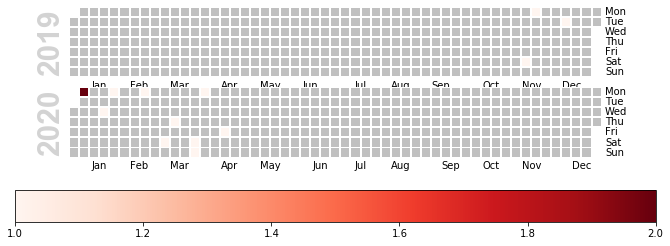

In [9]:
mapseed_dates = [file_tstamp(f) for f in mapseed_files]
print('%i server resets found' % len(mapseed_dates))
print(*mapseed_dates, sep='\n')

mapseed_df = pd.DataFrame(mapseed_dates, columns=['date'])
mapseed_df['date'] = pd.to_datetime(mapseed_df['date'])
mapseed_df['seed_reset'] = 1
mapseed = pd.Series(mapseed_df['seed_reset'].values, index=mapseed_df['date'])

fig,ax = calplot(mapseed, cmap='Reds', fillcolor='silver')
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation = 'horizontal')

## Wrangle new-style map change data

### Clean up & concatenate map change files

Load releases:

In [10]:
ver_file = '../1_download/outputs/version_history.tsv'

# Load file
ver = pd.read_csv(ver_file, sep='\t')
ver.head()

,release,timestamp
0,1,1.483052e+09
1,5,1.483472e+09
2,8,1.484065e+09
3,14,1.484961e+09
4,16,1.492207e+09


Helper function: Find closest-matching release

In [11]:
def find_version(start_t):

    tmp_ver = ver.copy()
    tmp_ver['lag'] = start_t - tmp_ver['timestamp']
    tmp_ver = tmp_ver[tmp_ver['lag'] >= 0]

    file_ver = tmp_ver.loc[tmp_ver['lag'].idxmin()].release
    file_ver = int(file_ver)
    
    return file_ver

Helper function: Read map change file and convert into a nice dataframe

In [12]:
def make_map_df(f):

    # Read start time from first line
    with open(f) as handle:
        start_line = handle.readline()
    start_str = str_extract('\d+\.\d+', start_line)
    start_t = float(start_str)

    # Match start time to release
    log_release = find_version(start_t)
    
    # Out file
    out_file = 'outputs/maplog/maplog_release-%i_start-%i.tsv' % (log_release, start_t)

    # Convert to dataframe
    log_df = pd.read_table(f, sep=' ', skiprows=1, header=None, names=['t_elapsed', 'x', 'y', 'object_id', 'player_id'])
    log_df = log_df.dropna()
    return log_df, out_file

Read all mapchange files and convert to dataframe:

In [13]:
for f in notebook.tqdm(new_map_files):
    tmp_df, out_f = make_map_df(f)
    
    # Save to file
    tmp_df.to_csv(out_f, sep='\t', index=False)

/Users/nvelez/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/nvelez/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


## Detect map seed changes

Find seed files:

In [17]:
seed_files = gsearch(map_dir, '*mapSeed.txt')
seed_files.sort()
print(*seed_files, sep='\n')

../data/publicMapChangeData/bigserver2.onehouronelife.com/1573895673time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1574102503time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1576038671time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1578345720time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1578354747time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1579713519time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1580144896time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1581985139time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1583642903time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1584061484time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1585440511time_mapSeed.txt
../data/publicMapChangeData/bigserver2.onehouronelife.com/1585512

Read seed files:

In [29]:
seed_list = []
seed_file = 'outputs/seed_changes.txt'

for f in seed_files:
    tstamp = str_extract('[0-9]+(?=time)', f)
    seed_list.append(tstamp)

seed_list = '\n'.join(seed_list)

with open(seed_file, 'w') as out:
    out.writelines(seed_list)